In [852]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import plotly.plotly as py
from plotly.plotly import iplot
import seaborn as sns

from textwrap import wrap
from datetime import date, timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn import utils

import statsmodels.api as sm
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV


In [783]:
#Reading the data

col_names = ['video_id','title','channel_title','category_id','tags','views','likes','dislikes','comment_total','thumbnail_link','date']

video_data = pd.read_csv('USvideos.csv',usecols = col_names)

In [784]:
video_data.head(3)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09


In [785]:
#Checking for null values

video_data.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [786]:
#Checking for incorrect date values

video_data['date'].unique()

array(['13.09', '14.09', '15.09', '16.09', '17.09', '18.09', '19.09',
       '20.09', '21.09', '22.09', '23.09', '24.09', '25.09', '26.09',
       '26.0903jeumSTSzc', '27.09', '28.09', '29.09', '30.09', '1.1',
       '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1', '9.1', '100',
       '10.1', '11.1', '12.1', '13.1', '14.1', '15.1', '16.1', '17.1',
       '18.1', '19.1', '20.1', '21.1', '22.1'], dtype=object)

In [787]:
#Replacing incorrect date values

video_data.loc[video_data['date'] == '26.0903jeumSTSzc', 'date'] = '26.09'
video_data.loc[video_data['date'] == '100', 'date'] = '9.1'


In [788]:
#Correcting the dates for Oct

for i in range(1,23):
    video_data.loc[video_data['date'] == str(i)+'.1', 'date'] = str(i)+'.10'


In [789]:
video_data['date'].unique()

array(['13.09', '14.09', '15.09', '16.09', '17.09', '18.09', '19.09',
       '20.09', '21.09', '22.09', '23.09', '24.09', '25.09', '26.09',
       '27.09', '28.09', '29.09', '30.09', '1.10', '2.10', '3.10', '4.10',
       '5.10', '6.10', '7.10', '8.10', '9.10', '10.10', '11.10', '12.10',
       '13.10', '14.10', '15.10', '16.10', '17.10', '18.10', '19.10',
       '20.10', '21.10', '22.10'], dtype=object)

In [790]:
#Changing the format of date

#video_data['date'] = video_data['date'].apply(lambda x: pd.to_datetime(str(x).replace('.','')+"2017",
#                                                                     format='%d%m%Y'))
#video_data['date'] = video_data['date'].dt.date

In [791]:
video_data.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [792]:
video_data.shape

(7998, 11)

In [793]:
#Checking for duplicates 

video_data.drop_duplicates()
video_data.shape

(7998, 11)

In [794]:
video_data.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [795]:
#Displaying graph before removing outliers

def before_removing_outliers():
    for i in range(5,9):
        fig, ax =plt.subplots(1,2,figsize=(8,5))
        sns.kdeplot(video_data.iloc[:,i], shade=True,ax=ax[0])
        sns.boxplot(x=video_data.iloc[:,i],ax=ax[1])
        plt.ylabel('count')
        fig.show()


C:\Users\monic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\l

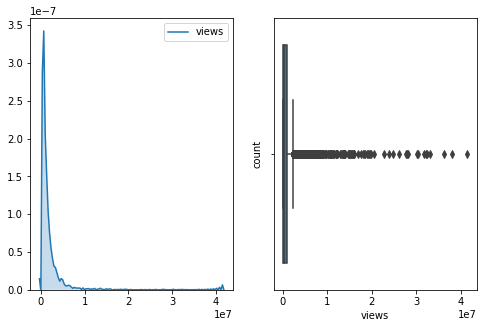

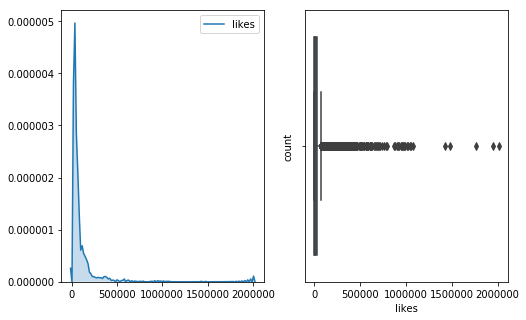

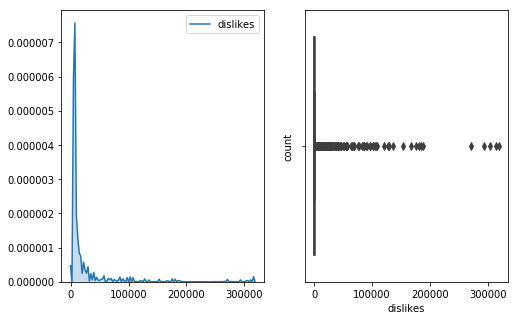

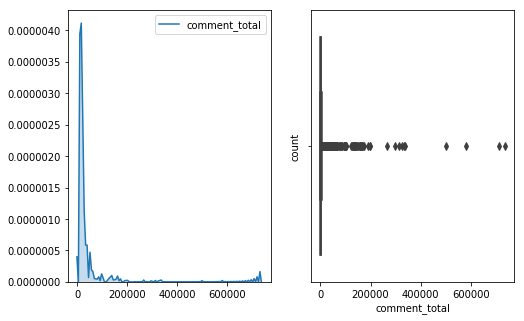

In [796]:
before_removing_outliers()

In [797]:
#Saving the dataframe to csv
video_data.to_csv('case1_data.csv')

## Performing log transformation

In [798]:
#Log transformation because data is left skewed

video_data['logviews'] = np.log(video_data['views'])
video_data['loglikes'] = np.log(video_data['likes'])
video_data['logdislikes'] = np.log(video_data['dislikes'])
video_data['logcomment_total'] = np.log(video_data['comment_total'])

C:\Users\monic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log

C:\Users\monic\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

C:\Users\monic\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log

C:\Users\monic\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log



In [799]:
video_data.shape

(7998, 15)

In [800]:
video_data.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,logviews,loglikes,logdislikes,logcomment_total
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,15.295757,12.676242,8.687948,10.741709
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,15.877312,12.132711,10.191632,-inf
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,15.581253,13.264899,10.590969,12.047710
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,14.787086,10.125631,8.421123,9.459464
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,13.970915,11.479017,6.342121,8.804775


In [801]:
#After log transformation

def displayGraphs():
    for i in range(11,15):
        fig, ax =plt.subplots(1,2,figsize=(8,5))
        sns.kdeplot(video_data.iloc[:,i], shade=True,ax=ax[0])
        sns.boxplot(x=video_data.iloc[:,i],ax=ax[1])
        plt.ylabel('Count')
        fig.show()


C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



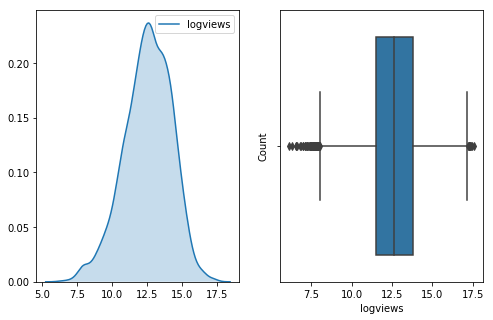

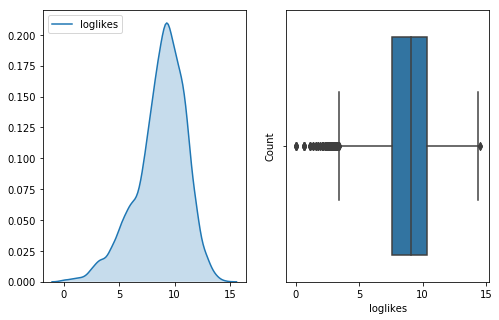

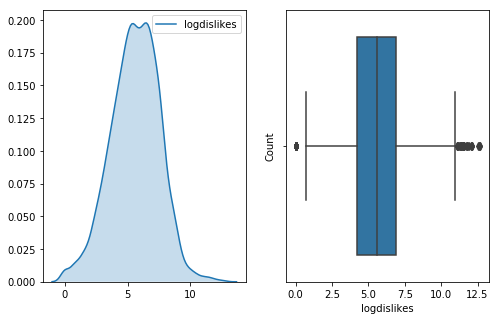

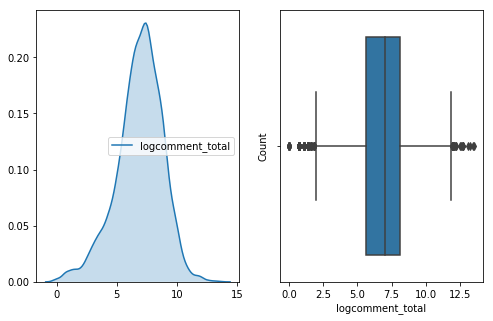

In [802]:
displayGraphs()

## Removing Outliers

In [803]:
#Removing outliers Loglikes

video_data[video_data['loglikes'] >= 14].count()
video_data[video_data['loglikes'] <=4.5 ].count()


video_id            469
title               469
channel_title       469
category_id         469
tags                469
views               469
likes               469
dislikes            469
comment_total       469
thumbnail_link      469
date                469
logviews            469
loglikes            469
logdislikes         469
logcomment_total    469
dtype: int64

In [804]:
#Removing outliers loglikes

video_data = video_data[video_data['loglikes'] < 14]
video_data = video_data[video_data['loglikes'] > 4.5]

video_data.shape

(7524, 15)

In [805]:
#Removing outliers logdislikes

video_data[video_data['logdislikes'] > 11].count()
video_data[video_data['logdislikes'] <= 1].count()

video_id            50
title               50
channel_title       50
category_id         50
tags                50
views               50
likes               50
dislikes            50
comment_total       50
thumbnail_link      50
date                50
logviews            50
loglikes            50
logdislikes         50
logcomment_total    50
dtype: int64

In [806]:
video_data = video_data[video_data['logdislikes'] < 11]
video_data = video_data[video_data['logdislikes'] > 1]

video_data.shape

(7442, 15)

In [807]:
#Removing outliers logviews

video_data[video_data['logviews'] >= 16.7].count()
video_data[video_data['logviews'] <= 9].count()


video_id            27
title               27
channel_title       27
category_id         27
tags                27
views               27
likes               27
dislikes            27
comment_total       27
thumbnail_link      27
date                27
logviews            27
loglikes            27
logdislikes         27
logcomment_total    27
dtype: int64

In [808]:
#Removing outliers logviews

video_data = video_data[video_data['logviews'] <= 16.7]
video_data = video_data[video_data['logviews'] >= 9]

video_data.shape

(7405, 15)

In [809]:
#Removing outliers logcomment_total

video_data[video_data['logcomment_total'] >= 11.5].count()
video_data[video_data['logcomment_total'] <= 3].count()


video_id            214
title               214
channel_title       214
category_id         214
tags                214
views               214
likes               214
dislikes            214
comment_total       214
thumbnail_link      214
date                214
logviews            214
loglikes            214
logdislikes         214
logcomment_total    214
dtype: int64

In [810]:
#Removing outliers logcomment_total

video_data = video_data[video_data['logcomment_total'] < 11.5]
video_data = video_data[video_data['logcomment_total'] >= 3]

video_data.shape

(7170, 15)

In [811]:
video_data.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,logviews,loglikes,logdislikes,logcomment_total
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,15.295757,12.676242,8.687948,10.741709
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,14.787086,10.125631,8.421123,9.459464
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,13.970915,11.479017,6.342121,8.804775
5,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09,14.086640,10.448917,6.298949,8.019613
6,8wNr-NQImFg,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,9985,297,1071,https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg,13.09,13.409299,9.208839,5.693732,6.976348


C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\monic\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



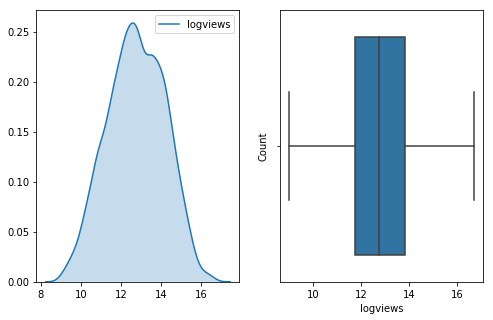

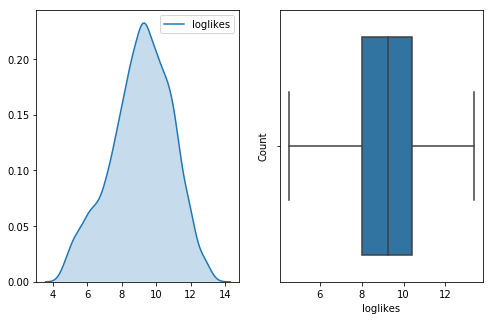

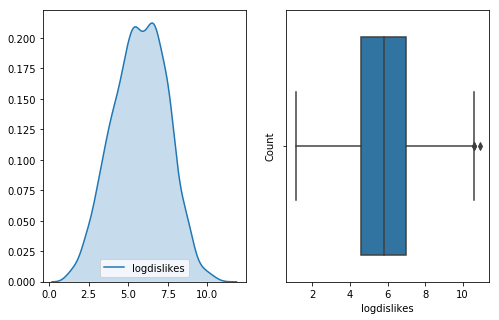

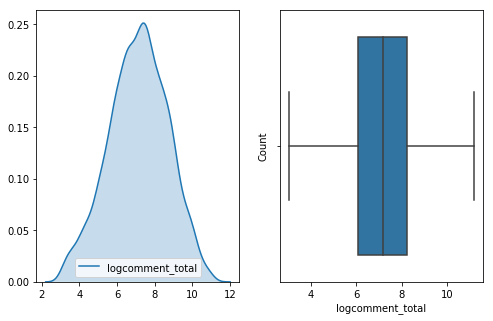

In [812]:
displayGraphs()

In [813]:
video_data.describe()

,category_id,views,likes,dislikes,comment_total,logviews,loglikes,logdislikes,logcomment_total
count,7170.000000,7.170000e+03,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000,7170.000000
mean,20.156485,8.748298e+05,31494.608787,1145.484379,3648.994979,12.764598,9.128649,5.747506,7.131256
std,7.469624,1.445165e+06,58978.417958,2746.038643,6601.953147,1.426802,1.749774,1.699603,1.560414
min,1.000000,8.259000e+03,93.000000,3.000000,21.000000,9.019059,4.532599,1.098612,3.044522
25%,17.000000,1.258125e+05,2977.250000,96.000000,432.000000,11.742548,7.998755,4.564348,6.068426
50%,23.000000,3.513035e+05,10412.500000,330.500000,1327.000000,12.769406,9.250762,5.800606,7.190676
75%,25.000000,1.026890e+06,33435.750000,1074.000000,3844.750000,13.842045,10.417381,6.979145,8.254464
max,43.000000,1.760332e+07,624601.000000,55588.000000,70773.000000,16.683598,13.344868,10.925723,11.167233


# Top Channel and Category based on Views, Likes, Dislikes and Comments 

In [814]:
#Mapping the category_id to category_name
video_data.loc[video_data['category_id'] == 1, 'category_name'] = 'Film & Animation'
video_data.loc[video_data['category_id'] == 24, 'category_name'] = 'Entertainment'
video_data.loc[video_data['category_id'] == 28, 'category_name'] = 'Science & Technology'
video_data.loc[video_data['category_id'] == 23, 'category_name'] = 'Comedy'
video_data.loc[video_data['category_id'] == 22, 'category_name'] = 'People & Blogs'
video_data.loc[video_data['category_id'] == 26, 'category_name'] = 'Howto & Style'
video_data.loc[video_data['category_id'] == 10, 'category_name'] = 'News & Politics'
video_data.loc[video_data['category_id'] == 17, 'category_name'] = 'Sports'
video_data.loc[video_data['category_id'] == 27, 'category_name'] = 'Education'
video_data.loc[video_data['category_id'] == 2, 'category_name'] = 'Autos & Vehicles'
video_data.loc[video_data['category_id'] == 20, 'category_name'] = 'Gaming'
video_data.loc[video_data['category_id'] == 15, 'category_name'] = 'Pets & Animals'
video_data.loc[video_data['category_id'] == 19, 'category_name'] = 'Travel & Events'
video_data.loc[video_data['category_id'] == 29, 'category_name'] = 'Nonprofits & Activism'
video_data.loc[video_data['category_id'] == 43, 'category_name'] = 'Shows'


## Top Channels and Category based on most Viewed Videos

In [815]:
#Top Viewed videos
top_views = video_data.sort_values(['views'],ascending=False)
top_100_views = top_views.head(100)

In [816]:
#Saving the dataframe to csv file
top_views.to_csv('cleaned_top_views.csv')

Text(0.5, 1.0, 'MOST VIEWED CHANNELS')

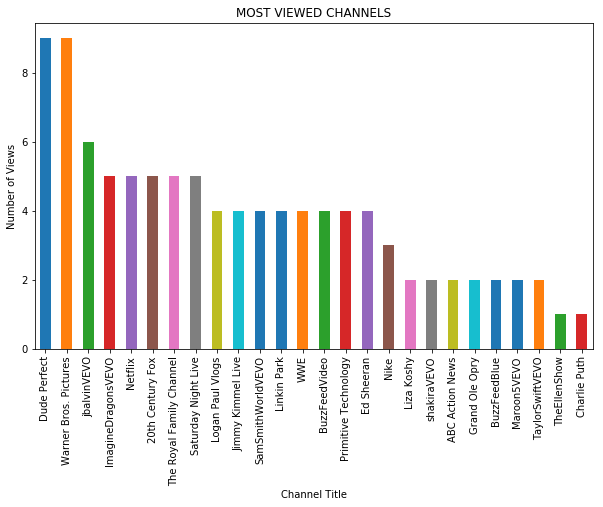

In [817]:
#Top Channel Titles based on views

top_100_views['channel_title'].value_counts().plot('bar',figsize=[10,6])
plt.xlabel('Channel Title')
plt.ylabel('Number of Views')
plt.title('MOST VIEWED CHANNELS')


C:\Users\monic\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0.5, 1.0, 'MOST VIEWED VIDEO CATEGORY')

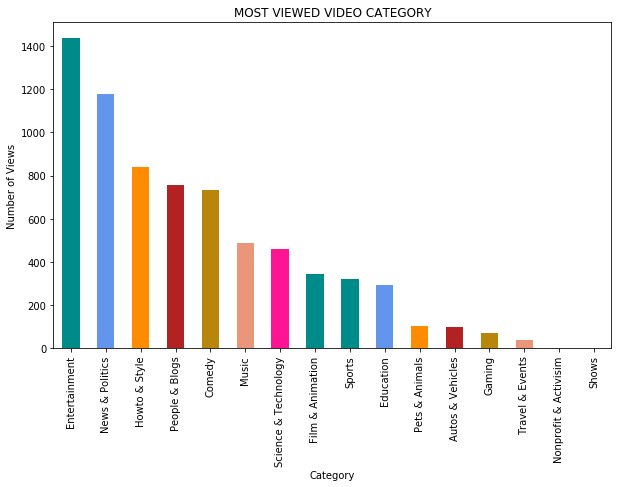

In [818]:
#Top Categories based on views

ax = top_views['category_id'].value_counts().plot('bar',figsize=[10,6],colors=['darkcyan','cornflowerblue', 'darkorange',
'firebrick', 'darkgoldenrod', 'darksalmon','deeppink'])
ax.set_xticklabels(['Entertainment','News & Politics','Howto & Style','People & Blogs', 'Comedy','Music','Science & Technology','Film & Animation','Sports','Education','Pets & Animals','Autos & Vehicles','Gaming','Travel & Events','Nonprofit & Activisim','Shows'])
plt.xlabel('Category')
plt.ylabel('Number of Views')
plt.title('MOST VIEWED VIDEO CATEGORY')



## Top Channels and Category based on most Liked  Videos

In [819]:
#Top Liked videos 
top_likes = video_data.sort_values(['likes'],ascending=False)
top_100_likes = top_likes.head(100)

In [820]:
#Saving dataframe to csv file
top_likes.to_csv('cleaned_top_likes.csv')

In [821]:
top_100_likes.head(3)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,logviews,loglikes,logdislikes,logcomment_total,category_name
2162,Tm8LGxTLtQk,One More Light (Official Video) - Linkin Park,Linkin Park,10,Linkin Park|Chester Bennington|One More Light|...,8134428,624601,6011,53798,https://i.ytimg.com/vi/Tm8LGxTLtQk/default.jpg,23.09,15.911616,13.344868,8.701346,10.892992,News & Politics
7379,gOsM-DYAEhY,Imagine Dragons - Whatever It Takes,ImagineDragonsVEVO,10,Imagine Dragons|ImagineDragons|Whatever It Tak...,11985474,611911,5252,28308,https://i.ytimg.com/vi/gOsM-DYAEhY/default.jpg,19.10,16.299206,13.324342,8.566364,10.250900,News & Politics
1863,Tm8LGxTLtQk,One More Light (Official Video) - Linkin Park,Linkin Park,10,Linkin Park|Chester Bennington|One More Light|...,7034721,586276,5527,52039,https://i.ytimg.com/vi/Tm8LGxTLtQk/default.jpg,22.09,15.766369,13.281546,8.617400,10.859749,News & Politics


Text(0.5, 1.0, 'MOST LIKED CHANNELS')

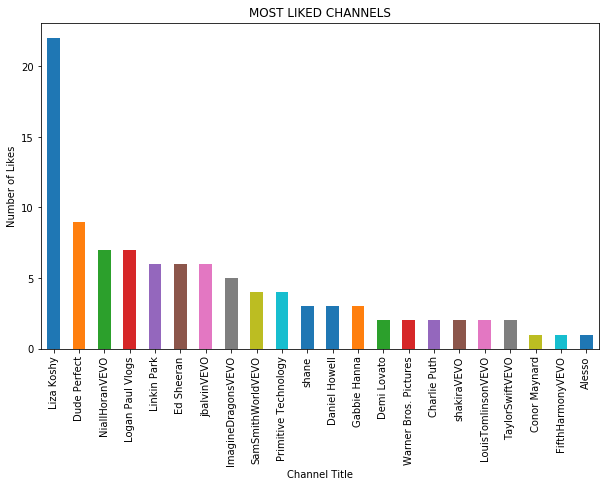

In [822]:
#Top Channel Titles based on likes

top_100_likes['channel_title'].value_counts().plot('bar',figsize=[10,6])
plt.xlabel('Channel Title')
plt.ylabel('Number of Likes')
plt.title('MOST LIKED CHANNELS')


C:\Users\monic\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0.5, 1.0, 'MOST LIKED VIDEO CATEGORY')

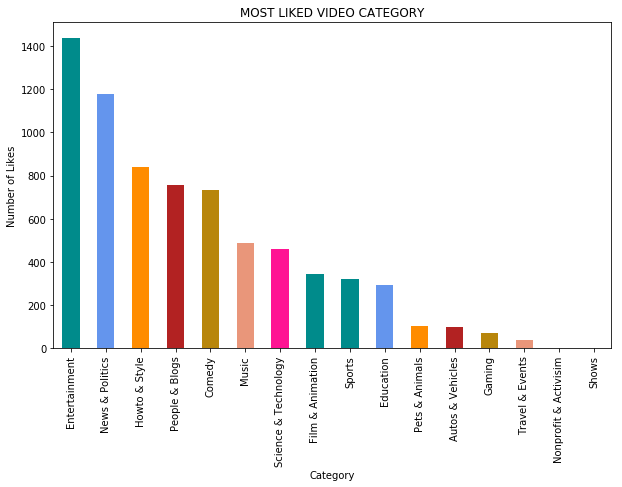

In [823]:
#Top Categories based on likes

ax = top_likes['category_id'].value_counts().plot('bar',figsize=[10,6], colors=['darkcyan','cornflowerblue', 'darkorange',
'firebrick', 'darkgoldenrod', 'darksalmon','deeppink'])
ax.set_xticklabels(['Entertainment','News & Politics','Howto & Style', 'People & Blogs','Comedy','Music','Science & Technology','Film & Animation','Sports','Education','Pets & Animals','Autos & Vehicles','Gaming','Travel & Events','Nonprofit & Activisim','Shows'])
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.title('MOST LIKED VIDEO CATEGORY')


## Top Channels and Category based on most Commented Videos

In [824]:
#Top Commented videos 
top_commented_videos = video_data.sort_values(['comment_total'],ascending=False)
top_100_commented_videos = top_commented_videos.head(100)

In [825]:
#Saving dataframe to csv file
top_commented_videos.to_csv('cleaned_top_comments.csv')

In [826]:
top_100_commented_videos.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,logviews,loglikes,logdislikes,logcomment_total,category_name
7665,WHvT-oGf6ik,Out Loud (Official Music Video),Gabbie Hanna,26,the gabbie show|official video|out loud|music ...,2937924,343485,10423,70773,https://i.ytimg.com/vi/WHvT-oGf6ik/default.jpg,21.10,14.893214,12.746899,9.251770,11.167233,Howto & Style
7418,WHvT-oGf6ik,Out Loud (Official Music Video),Gabbie Hanna,26,the gabbie show|official video|out loud|music ...,2463574,315097,9018,66778,https://i.ytimg.com/vi/WHvT-oGf6ik/default.jpg,20.10,14.717124,12.660636,9.106978,11.109129,Howto & Style
7891,WHvT-oGf6ik,Out Loud (Official Music Video),Gabbie Hanna,26,the gabbie show|official video|out loud|music ...,3291670,359882,10988,66258,https://i.ytimg.com/vi/WHvT-oGf6ik/default.jpg,22.10,15.006906,12.793531,9.304559,11.101311,Howto & Style
5869,OY_cUBpDoiI,What you NEED to start a YouTube channel (YIAY...,jacksfilms,23,jacksfilms|yiay|youtube|channel|need|camera|ed...,1093358,64225,757,63436,https://i.ytimg.com/vi/OY_cUBpDoiI/default.jpg,12.10,13.904764,11.070148,6.629363,11.057787,Comedy
5618,OY_cUBpDoiI,What you NEED to start a YouTube channel (YIAY...,jacksfilms,23,jacksfilms|yiay|youtube|channel|need|camera|ed...,1012645,61512,636,61246,https://i.ytimg.com/vi/OY_cUBpDoiI/default.jpg,11.10,13.828076,11.026988,6.455199,11.022654,Comedy


Text(0.5, 1.0, 'MOST COMMENTED CHANNELS')

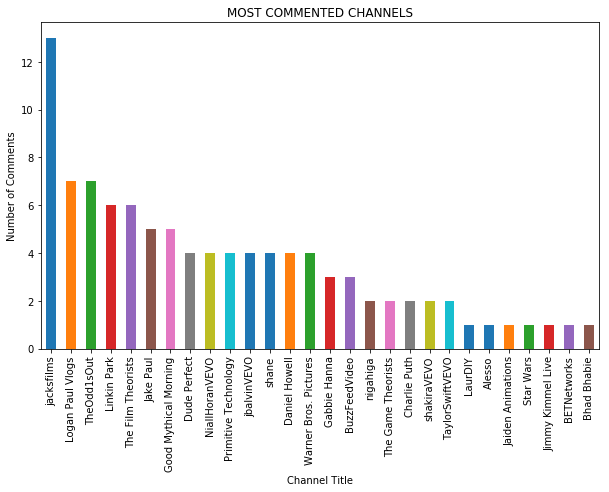

In [827]:
#Top Channel Titles based on comments

top_100_commented_videos['channel_title'].value_counts().plot('bar',figsize=[10,6])
plt.xlabel('Channel Title')
plt.ylabel('Number of Comments')
plt.title('MOST COMMENTED CHANNELS')


C:\Users\monic\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0.5, 1.0, 'MOST COMMENTED VIDEO CATEGORY')

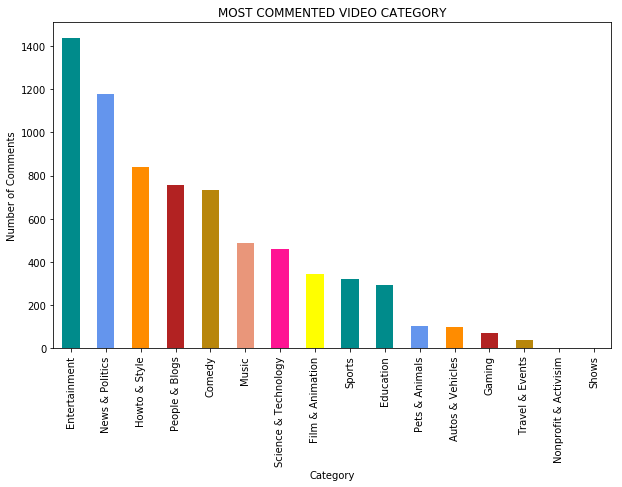

In [828]:
#Top Categories based on comments

ax = top_commented_videos['category_id'].value_counts().plot('bar',figsize=[10,6], colors=['darkcyan','cornflowerblue', 'darkorange',
'firebrick', 'darkgoldenrod', 'darksalmon','deeppink','yellow'])
ax.set_xticklabels(['Entertainment','News & Politics','Howto & Style', 'People & Blogs','Comedy','Music','Science & Technology','Film & Animation','Sports','Education','Pets & Animals','Autos & Vehicles','Gaming','Travel & Events','Nonprofit & Activisim','Shows'])
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.title('MOST COMMENTED VIDEO CATEGORY')


## Correlation matrix

                  views     likes  dislikes  comment_total
views          1.000000  0.761393  0.589985       0.657845
likes          0.761393  1.000000  0.497666       0.791387
dislikes       0.589985  0.497666  1.000000       0.607612
comment_total  0.657845  0.791387  0.607612       1.000000


Text(0.5, 1.0, 'Correlation matrix')

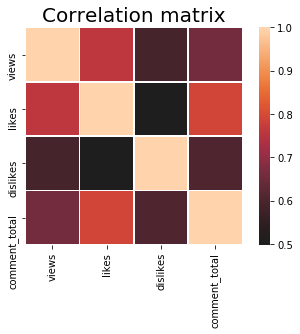

In [829]:
corr_us = video_data.loc[:,['views', 'likes', 'dislikes','comment_total']].corr()
print(corr_us)

ax1 = sns.heatmap(corr_us, vmax=1, center=0.5, square=True, linewidths=.5) 
ax1.set_title('Correlation matrix', fontsize=20)

# Machine Learning Algorithms implementation

In [830]:
video_data.to_csv('cleaned_video_data.csv')

In [831]:
video_data.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,logviews,loglikes,logdislikes,logcomment_total,category_name
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,15.295757,12.676242,8.687948,10.741709,Entertainment
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,14.787086,10.125631,8.421123,9.459464,Science & Technology
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,13.970915,11.479017,6.342121,8.804775,Comedy
5,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09,14.086640,10.448917,6.298949,8.019613,Film & Animation
6,8wNr-NQImFg,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,9985,297,1071,https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg,13.09,13.409299,9.208839,5.693732,6.976348,Comedy


### Creating X,y and splitting the dataset into training and testing


In [832]:

X, y = video_data[['loglikes','logdislikes','logcomment_total']].values, video_data['logviews']
#X, y = video_data[['loglikes','logdislikes','category_id']].values, video_data['logviews']

#use for original data
#X, y = video_data[['likes','dislikes','comment_total','category_id']].values, video_data['views']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.40, random_state=0)


In [833]:
video_data=video_data.reset_index()

### Scaling the features


In [834]:

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [835]:
#Train decision tree model

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

tree_model = DecisionTreeClassifier(random_state=0,max_depth=40)
tree_model.fit(X_train, y_train_encoded)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree_model.score(X_train, y_train_encoded)))
print("Accuracy on test set: {:.3f}".format(tree_model.score(X_test, y_test_encoded)))

y_pred_tree = tree_model.predict(X_test)
print("Predicted value: ",y_pred_tree)


Decision Tree
Accuracy on training set: 0.183
Accuracy on test set: 0.001
Predicted value:  [   2 1433 1008 ... 1008   53  489]


In [836]:
#Train random forest model

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

forest_model = RandomForestClassifier(n_estimators=5,random_state=0)
forest_model.fit(X_train, y_train_encoded)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest_model.score(X_train, y_train_encoded)))
print("Accuracy on test set: {:.3f}".format(forest_model.score(X_test, y_test_encoded)))

y_pred_forest = forest_model.predict(X_test)
print("Predicted value: ",y_pred_forest)


Random Forest
Accuracy on training set: 0.911
Accuracy on test set: 0.001
Predicted value:  [ 827  398 1471 ... 2498 2159  837]


## Multiple Linear Regression

In [848]:
#Regression Model

regression_model = linear_model.LinearRegression()
result_regression = regression_model.fit(X_train, y_train)

print("Regression")
print("Accuracy on training set: {:.3f}".format(regression_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regression_model.score(X_test, y_test)))

y_pred_regression = regression_model.predict(X_test)
print("Predicted value: ",y_pred_regression)


Regression
Accuracy on training set: 0.800
Accuracy on test set: 0.795
Predicted value:  [10.96951403 11.57155972 13.46766584 ... 13.830497   12.19341113
 12.3768983 ]


C:\Users\monic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0, 0.5, 'Predictions')

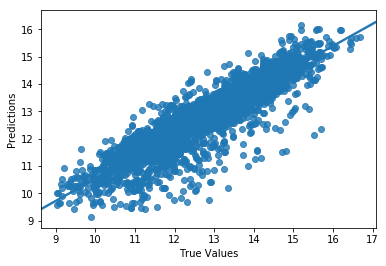

In [838]:
#Scatter plot for regression

sns.regplot(y_test,y_pred_regression)
plt.xlabel("True Values")
plt.ylabel("Predictions")


In [839]:
#Result for Regression

X_train_cnst = sm.add_constant(X_train)
model_reg = sm.OLS(y_train,X_train_cnst).fit()
model_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logviews   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     5738.
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        13:15:42   Log-Likelihood:                -4173.7
No. Observations:                4302   AIC:                             8355.
Df Residuals:                    4298   BIC:                             8381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0037      0.052    133.709      0.000       6.901       7.106
x1             0.3477      0.011     31.397      0.000       0.326       0.369
x2             0.4611      0.010     43.954      0.000       0.441       0.482
x3            -0.0084      0.015     -0.546      0.585      -0.039       0.022
==============================================================================
Omnibus:                      538.100   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1340.492
Skew:                           0.713   Prob(JB):                    8.24e-292
Kurtosis:                       5.333   Cond. No.                         71.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Grid Search for Ridge and Lasso Regression



In [840]:

grid_param = {  
    'alpha': [0.1,0.4,0.7,1.0]
}

gd_sr = GridSearchCV(estimator=lasso_model,
                     param_grid=grid_param,
                     scoring='r2',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_  
print(best_parameters)

{'alpha': 0.1}


## Ridge Regression

In [841]:
#Ridge Regression

ridge_model = Ridge(alpha=1)
result_ridge = ridge_model.fit(X_train, y_train)

print("Ridge Regression")
print("Accuracy on training set: {:.3f}".format(ridge_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ridge_model.score(X_test, y_test)))

y_pred_ridge = ridge_model.predict(X_test)
print("Predicted value: ",y_pred_ridge)


Ridge Regression
Accuracy on training set: 0.800
Accuracy on test set: 0.795
Predicted value:  [10.96977642 11.57164335 13.46766115 ... 13.83052403 12.1933395
 12.37695124]


Text(0, 0.5, 'Predictions')

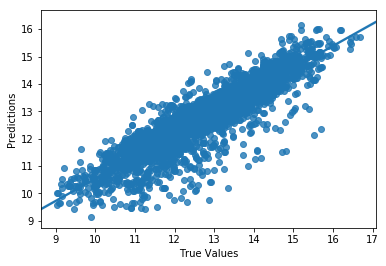

In [850]:
#Scatter plot for Ridge Regression

sns.regplot(y_test,y_pred_ridge)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [843]:
#Result for Ridge Regression

X_train_cnst = sm.add_constant(X_train)
model_reg = sm.OLS(y_train,X_train_cnst).fit()
model_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logviews   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     5738.
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        13:15:47   Log-Likelihood:                -4173.7
No. Observations:                4302   AIC:                             8355.
Df Residuals:                    4298   BIC:                             8381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0037      0.052    133.709      0.000       6.901       7.106
x1             0.3477      0.011     31.397      0.000       0.326       0.369
x2             0.4611      0.010     43.954      0.000       0.441       0.482
x3            -0.0084      0.015     -0.546      0.585      -0.039       0.022
==============================================================================
Omnibus:                      538.100   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1340.492
Skew:                           0.713   Prob(JB):                    8.24e-292
Kurtosis:                       5.333   Cond. No.                         71.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso Regression

In [844]:

lasso_model = Lasso(alpha=0.1)
result_lasso = lasso_model.fit(X_train,y_train)

print("Lasso Regression")
print("Accuracy on training set: {:.3f}".format(lasso_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lasso_model.score(X_test, y_test)))

y_pred_lasso = lasso_model.predict(X_test)
print("Predicted value: ",y_pred_lasso)

Lasso Regression
Accuracy on training set: 0.798
Accuracy on test set: 0.795
Predicted value:  [11.06595891 11.63137857 13.43395248 ... 13.78029205 12.21813413
 12.3973375 ]


Text(0, 0.5, 'Predictions')

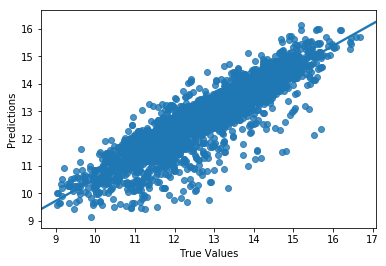

In [851]:
#Scatter plot for Lasso Regression

sns.regplot(y_test,y_pred_ridge)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [846]:
#Result for Ridge Regression

X_train_cnst = sm.add_constant(X_train)
model_reg = sm.OLS(y_train,X_train_cnst).fit()
model_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logviews   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     5738.
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        13:15:47   Log-Likelihood:                -4173.7
No. Observations:                4302   AIC:                             8355.
Df Residuals:                    4298   BIC:                             8381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0037      0.052    133.709      0.000       6.901       7.106
x1             0.3477      0.011     31.397      0.000       0.326       0.369
x2             0.4611      0.010     43.954      0.000       0.441       0.482
x3            -0.0084      0.015     -0.546      0.585      -0.039       0.022
==============================================================================
Omnibus:                      538.100   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1340.492
Skew:                           0.713   Prob(JB):                    8.24e-292
Kurtosis:                       5.333   Cond. No.                         71.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cross Validation

In [847]:
#Cross Validations 

all_accuracies = cross_val_score(estimator=regression_model, X=X, y=y, cv=5) 
print("Cross Validation accuracies:", all_accuracies)
print("Mean accuracies:", all_accuracies.mean()) 
print("Standard Deviation:",all_accuracies.std())


Cross Validation accuracies: [0.80124499 0.81333434 0.80265797 0.76042607 0.80353215]
Mean accuracies: 0.7962391047135909
Standard Deviation: 0.018407985662640996
